In [1]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
movies_data=pd.read_csv('movies.csv')

In [3]:
movies_data.shape

(9742, 3)

In [4]:
ratings_data = pd.read_csv('ratings.csv')

In [5]:
ratings_data.shape

(100836, 4)

In [6]:
df = pd.read_csv('ratings.csv')

# Count the number of unique user IDs
unique_users = len(df['userId'].unique())

# Print the result
print(f"There are {unique_users} unique user IDs in ratings.csv.")

There are 610 unique user IDs in ratings.csv.


In [7]:
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
# Read the CSV file into a pandas dataframe
df = pd.read_csv('ratings.csv')

# Find the movie ID with the maximum number of user ratings
max_movie_id = df['movieId'].value_counts().idxmax()

# Print the result
print(f"The movie ID that has received the maximum number of user ratings is {max_movie_id}.")

The movie ID that has received the maximum number of user ratings is 356.


In [9]:
import pandas as pd

# Load the CSV files into pandas dataframes
tags_df = pd.read_csv('tags.csv')
movies_df = pd.read_csv('movies.csv')

# Filter the movies dataframe to only include rows where the title is "Matrix, The (1999)"
matrix_movie = movies_df[movies_df['title'] == 'Matrix, The (1999)']

# Merge the tags dataframe with the filtered movies dataframe on the movieId column
matrix_tags = pd.merge(tags_df, matrix_movie, on='movieId')

# Print out the unique tags that were submitted by users for "Matrix, The (1999)"
print(matrix_tags['tag'].unique())


['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [10]:
import pandas as pd

# Load the CSV files into pandas dataframes
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Filter the movies dataframe to only include rows where the title is "Terminator 2: Judgment Day (1991)"
t2_movie = movies_df[movies_df['title'] == 'Terminator 2: Judgment Day (1991)']

# Merge the ratings dataframe with the filtered movies dataframe on the movieId column
t2_ratings = pd.merge(ratings_df, t2_movie, on='movieId')

# Calculate the average user rating for "Terminator 2: Judgment Day (1991)"
average_rating = t2_ratings['rating'].mean()

# Print out the average user rating
print(f"The average user rating for 'Terminator 2: Judgment Day (1991)' is **{average_rating:.2f}**.")

The average user rating for 'Terminator 2: Judgment Day (1991)' is **3.97**.


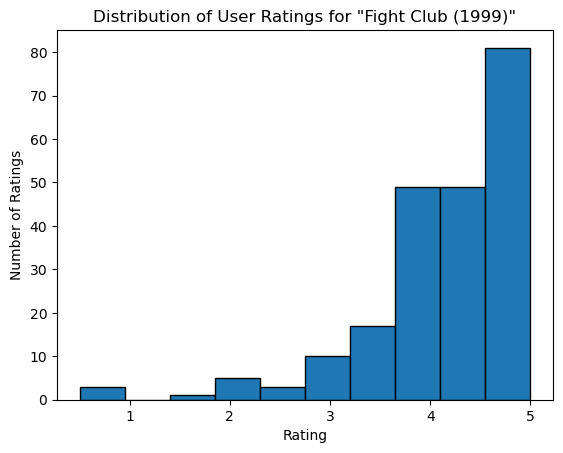

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files into pandas dataframes
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Filter the movies dataframe to only include rows where the title is "Fight Club (1999)"
fc_movie = movies_df[movies_df['title'] == 'Fight Club (1999)']

# Merge the ratings dataframe with the filtered movies dataframe on the movieId column
fc_ratings = pd.merge(ratings_df, fc_movie, on='movieId')

# Plot a histogram of the ratings
plt.hist(fc_ratings['rating'], bins=10, edgecolor='black')

# Add labels and a title to the plot
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')

# Show the plot
plt.show()


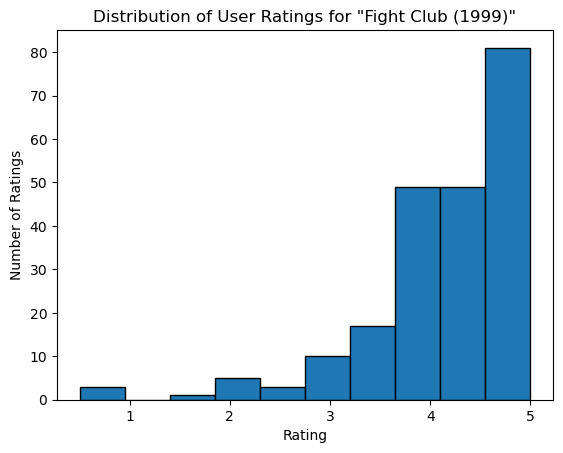

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files into pandas dataframes
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Filter the movies dataframe to only include rows where the title is "Fight Club (1999)"
fc_movie = movies_df[movies_df['title'] == 'Fight Club (1999)']

# Merge the ratings dataframe with the filtered movies dataframe on the movieId column
fc_ratings = pd.merge(ratings_df, fc_movie, on='movieId')

# Plot a histogram of the ratings
plt.hist(fc_ratings['rating'], bins=10, edgecolor='black')

# Add labels and a title to the plot
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')

# Show the plot
plt.show()


In [13]:
import pandas as pd

# Load the CSV files into pandas dataframes
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings
ratings_grouped = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']})

# Apply inner join on dataframe created from movies.csv and the grouped df from step 1
joined_df = pd.merge(movies_df, ratings_grouped, on='movieId', how='inner')

# Filter only those movies which have more than 50 user ratings (i.e. > 50)
popular_movies = joined_df[joined_df['rating']['count'] > 50]

# Print the resulting dataframe
print(popular_movies)


MergeError: Not allowed to merge between different levels. (1 levels on the left, 2 on the right)

In [14]:
import pandas as pd

# Load the CSV files into pandas dataframes
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings
ratings_grouped = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']})

# Apply inner join on dataframe created from movies.csv and the grouped df from step 1
joined_df = pd.merge(movies_df, ratings_grouped, on='movieId')

# Filter only those movies which have more than 50 user ratings (i.e. > 50)
popular_movies = joined_df[joined_df[('rating', 'count')] > 50]

# Print the resulting dataframe
print(popular_movies)

MergeError: Not allowed to merge between different levels. (1 levels on the left, 2 on the right)

In [15]:
import pandas as pd

# Load the CSV files into pandas dataframes
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings
ratings_grouped = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']})

In [16]:
joined_df = pd.merge(movies_df, ratings_grouped, on='movieId')

MergeError: Not allowed to merge between different levels. (1 levels on the left, 2 on the right)

In [17]:
import pandas as pd

# Load the CSV files into pandas dataframes
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings
ratings_grouped = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']})

# Flatten the MultiIndex in the ratings_grouped dataframe
ratings_grouped.columns = ratings_grouped.columns.map('_'.join)

# Apply inner join on dataframe created from movies.csv and the grouped df from step 1
joined_df = pd.merge(movies_df, ratings_grouped, left_on='movieId', right_index=True, how='inner')

# Filter only those movies which have more than 50 user ratings (i.e. > 50)
popular_movies = joined_df[joined_df['rating_count'] > 50]

# Print the resulting dataframe
print(popular_movies)


      movieId                             title  \
0           1                  Toy Story (1995)   
1           2                    Jumanji (1995)   
2           3           Grumpier Old Men (1995)   
5           6                       Heat (1995)   
6           7                    Sabrina (1995)   
...       ...                               ...   
8305   106782   Wolf of Wall Street, The (2013)   
8372   109374  Grand Budapest Hotel, The (2014)   
8376   109487               Interstellar (2014)   
8475   112852    Guardians of the Galaxy (2014)   
8691   122904                   Deadpool (2016)   

                                           genres  rating_count  rating_mean  
0     Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                      Adventure|Children|Fantasy           110     3.431818  
2                                  Comedy|Romance            52     3.259615  
5                           Action|Crime|Thriller           102     3.9

In [18]:
# Filter only those movies which have more than 50 user ratings (i.e. > 50)
# Filter only those movies which have more than 50 user ratings (i.e. > 50)
popular_movies = joined_df[joined_df['rating_count'] > 50]

# Find the movie with the highest average rating
most_popular_movie = popular_movies.loc[popular_movies[('rating_count', 'mean')].idxmax()]

# Print the title of the most popular movie based on average user ratings
print(f"The most popular movie based on average user ratings is **{most_popular_movie['title']}**.")

KeyError: ('rating_count', 'mean')

In [ ]:
import pandas as pd

# Load the CSV files into pandas dataframes
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings
ratings_grouped = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']})

# Apply inner join on dataframe created from movies.csv and the grouped df from step 1
joined_df = pd.merge(movies_df, ratings_grouped, on='movieId')

# Filter only those movies which have more than 50 user ratings (i.e. > 50)
popular_movies = joined_df[joined_df[('rating', 'count')] > 50]

# Find the movie with the highest average rating
most_popular_movie = popular_movies.loc[popular_movies[('rating', 'mean')].idxmax()]

# Print the title of the most popular movie based on average user ratings
print(f"The most popular movie based on average user ratings is **{most_popular_movie['title']}**.")


In [19]:
import pandas as pd

# Load the CSV files into pandas dataframes
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# 1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings
ratings_grouped = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']})

# Flatten the MultiIndex in the ratings_grouped dataframe
ratings_grouped.columns = ratings_grouped.columns.map('_'.join)

# 2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1
joined_df = pd.merge(movies_df, ratings_grouped, left_on='movieId', right_index=True, how='inner')

# 3. Filter only those movies which have more than 50 user ratings (i.e. > 50)
popular_movies = joined_df[joined_df['rating_count'] > 50]

# Find the most popular movie based on average user ratings
most_popular_movie = popular_movies[popular_movies['rating_mean'] == popular_movies['rating_mean'].max()]

# Print the resulting dataframe and most popular movie
print("Filtered Movies with more than 50 user ratings:")
print(popular_movies)
print("\nMost Popular Movie based on average user ratings:")
print(most_popular_movie[['title', 'rating_mean']])


Filtered Movies with more than 50 user ratings:
      movieId                             title  \
0           1                  Toy Story (1995)   
1           2                    Jumanji (1995)   
2           3           Grumpier Old Men (1995)   
5           6                       Heat (1995)   
6           7                    Sabrina (1995)   
...       ...                               ...   
8305   106782   Wolf of Wall Street, The (2013)   
8372   109374  Grand Budapest Hotel, The (2014)   
8376   109487               Interstellar (2014)   
8475   112852    Guardians of the Galaxy (2014)   
8691   122904                   Deadpool (2016)   

                                           genres  rating_count  rating_mean  
0     Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                      Adventure|Children|Fantasy           110     3.431818  
2                                  Comedy|Romance            52     3.259615  
5                      

In [20]:
import pandas as pd

# Load the CSV files into pandas dataframes
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings
ratings_grouped = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']})
ratings_grouped.columns = ratings_grouped.columns.map('_'.join)

# Apply inner join on dataframe created from movies.csv and the grouped df from step 1
joined_df = pd.merge(movies_df, ratings_grouped, left_on='movieId', right_index=True, how='inner')

# Filter only those movies which have more than 50 user ratings (i.e. > 50)
popular_movies = joined_df[joined_df['rating_count'] > 50]

# Identify the most popular movie based on average user ratings
most_popular_movie = popular_movies.loc[popular_movies['rating_mean'].idxmax()]

# Print the resulting dataframe and the most popular movie
print("Filtered Movies with More Than 50 Ratings:")
print(popular_movies)
print("\nMost Popular Movie Based on Average User Ratings:")
print(most_popular_movie[['title', 'rating_mean']])


Filtered Movies with More Than 50 Ratings:
      movieId                             title  \
0           1                  Toy Story (1995)   
1           2                    Jumanji (1995)   
2           3           Grumpier Old Men (1995)   
5           6                       Heat (1995)   
6           7                    Sabrina (1995)   
...       ...                               ...   
8305   106782   Wolf of Wall Street, The (2013)   
8372   109374  Grand Budapest Hotel, The (2014)   
8376   109487               Interstellar (2014)   
8475   112852    Guardians of the Galaxy (2014)   
8691   122904                   Deadpool (2016)   

                                           genres  rating_count  rating_mean  
0     Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                      Adventure|Children|Fantasy           110     3.431818  
2                                  Comedy|Romance            52     3.259615  
5                           

In [21]:
import pandas as pd

# Load the CSV files into pandas dataframes
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings
ratings_grouped = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']})
ratings_grouped.columns = ratings_grouped.columns.map('_'.join)

# Apply inner join on dataframe created from movies.csv and the grouped df from step 1
joined_df = pd.merge(movies_df, ratings_grouped, left_on='movieId', right_index=True, how='inner')

# Filter only those movies which have more than 50 user ratings (i.e. > 50)
popular_movies = joined_df[joined_df['rating_count'] > 50]

# Select the top 5 popular movies based on the number of user ratings
top_5_popular_movies = popular_movies.sort_values(by='rating_count', ascending=False).head(5)

# Print the resulting dataframe and the top 5 popular movies
print("Filtered Movies with More Than 50 Ratings:")
print(popular_movies)
print("\nTop 5 Popular Movies Based on Number of User Ratings:")
print(top_5_popular_movies[['title', 'rating_count']])


Filtered Movies with More Than 50 Ratings:
      movieId                             title  \
0           1                  Toy Story (1995)   
1           2                    Jumanji (1995)   
2           3           Grumpier Old Men (1995)   
5           6                       Heat (1995)   
6           7                    Sabrina (1995)   
...       ...                               ...   
8305   106782   Wolf of Wall Street, The (2013)   
8372   109374  Grand Budapest Hotel, The (2014)   
8376   109487               Interstellar (2014)   
8475   112852    Guardians of the Galaxy (2014)   
8691   122904                   Deadpool (2016)   

                                           genres  rating_count  rating_mean  
0     Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                      Adventure|Children|Fantasy           110     3.431818  
2                                  Comedy|Romance            52     3.259615  
5                           

In [22]:
grouped_ratings_df = ratings_df.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()


In [23]:
joined_df = pd.merge(movies_df, grouped_ratings_df, on='movieId', how='inner')


In [24]:
popular_movies_df = joined_df[joined_df['count'] > 50]


In [25]:
top_5_popular_movies_df = popular_movies_df.sort_values(by='count', ascending=False).head(5)


In [26]:
top_5_popular_movies_df[['title', 'count']]


,title,count
314,Forrest Gump (1994),329
277,"Shawshank Redemption, The (1994)",317
257,Pulp Fiction (1994),307
510,"Silence of the Lambs, The (1991)",279
1938,"Matrix, The (1999)",278


In [27]:
import pandas as pd

# Load the CSV files into pandas dataframes
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings
ratings_grouped = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']})
ratings_grouped.columns = ratings_grouped.columns.map('_'.join)

# Apply inner join on dataframe created from movies.csv and the grouped df from step 1
joined_df = pd.merge(movies_df, ratings_grouped, left_on='movieId', right_index=True, how='inner')

# Filter only those movies which have more than 50 user ratings (i.e. > 50)
popular_movies = joined_df[joined_df['rating_count'] > 50]

# Identify the top 5 popular movies based on the number of user ratings
top_5_popular_movies = popular_movies.nlargest(5, 'rating_count')

# Print the resulting dataframe and the top 5 popular movies
print("Filtered Movies with More Than 50 Ratings:")
print(popular_movies[['title', 'rating_count']])
print("\nTop 5 Popular Movies Based on Number of User Ratings:")
print(top_5_popular_movies[['title', 'rating_count']])


Filtered Movies with More Than 50 Ratings:
                                 title  rating_count
0                     Toy Story (1995)           215
1                       Jumanji (1995)           110
2              Grumpier Old Men (1995)            52
5                          Heat (1995)           102
6                       Sabrina (1995)            54
...                                ...           ...
8305   Wolf of Wall Street, The (2013)            54
8372  Grand Budapest Hotel, The (2014)            52
8376               Interstellar (2014)            73
8475    Guardians of the Galaxy (2014)            59
8691                   Deadpool (2016)            54

[436 rows x 2 columns]

Top 5 Popular Movies Based on Number of User Ratings:
                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, Th

In [28]:
import pandas as pd

# Load the CSV files into pandas dataframes
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings
ratings_grouped = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']})
ratings_grouped.columns = ratings_grouped.columns.map('_'.join)

# Apply inner join on dataframe created from movies.csv and the grouped df from step 1
joined_df = pd.merge(movies_df, ratings_grouped, left_on='movieId', right_index=True, how='inner')

# Filter only those movies which have more than 50 user ratings (i.e. > 50)
popular_movies = joined_df[joined_df['rating_count'] > 50]

# Filter Sci-Fi movies
sci_fi_movies = popular_movies[popular_movies['genres'].str.contains('Sci-Fi')]

# Identify the third most popular Sci-Fi movie based on the number of user ratings
third_most_popular_sci_fi = sci_fi_movies.nlargest(3, 'rating_count').iloc[-1]

# Print the resulting dataframe and the third most popular Sci-Fi movie
print("Filtered Sci-Fi Movies with More Than 50 Ratings:")
print(sci_fi_movies[['title', 'rating_count']])
print("\nThird Most Popular Sci-Fi Movie Based on Number of User Ratings:")
print(third_most_popular_sci_fi[['title', 'rating_count']])


Filtered Sci-Fi Movies with More Than 50 Ratings:
                                          title  rating_count
31    Twelve Monkeys (a.k.a. 12 Monkeys) (1995)           177
133                                Congo (1995)            57
144                      Johnny Mnemonic (1995)            53
145                          Judge Dredd (1995)            62
176                           Waterworld (1995)           115
...                                         ...           ...
7693                       Avengers, The (2012)            69
7767                    The Hunger Games (2012)            54
8376                        Interstellar (2014)            73
8475             Guardians of the Galaxy (2014)            59
8691                            Deadpool (2016)            54

[88 rows x 2 columns]

Third Most Popular Sci-Fi Movie Based on Number of User Ratings:
title           Jurassic Park (1993)
rating_count                     238
Name: 418, dtype: object


In [29]:
import pandas as pd

# Load the CSV files into pandas dataframes
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings
ratings_grouped = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']})
ratings_grouped.columns = ratings_grouped.columns.map('_'.join)

# Apply inner join on dataframe created from movies.csv and the grouped df from step 1
joined_df = pd.merge(movies_df, ratings_grouped, left_on='movieId', right_index=True, how='inner')

# Filter only those movies which have more than 50 user ratings (i.e. > 50)
popular_movies = joined_df[joined_df['rating_count'] > 50]

# Filter Sci-Fi movies from the popular movies dataframe
sci_fi_movies = popular_movies[popular_movies['genres'].str.contains('Sci-Fi')]

# Identify the third most popular Sci-Fi movie based on the number of user ratings
third_most_popular_sci_fi = sci_fi_movies.nlargest(3, 'rating_count').iloc[-1]

# Print the resulting dataframe and the third most popular Sci-Fi movie
print("Filtered Sci-Fi Movies with More Than 50 Ratings:")
print(sci_fi_movies[['title', 'rating_count']])
print("\nThird Most Popular Sci-Fi Movie Based on Number of User Ratings:")
print(third_most_popular_sci_fi[['title', 'rating_count']])


Filtered Sci-Fi Movies with More Than 50 Ratings:
                                          title  rating_count
31    Twelve Monkeys (a.k.a. 12 Monkeys) (1995)           177
133                                Congo (1995)            57
144                      Johnny Mnemonic (1995)            53
145                          Judge Dredd (1995)            62
176                           Waterworld (1995)           115
...                                         ...           ...
7693                       Avengers, The (2012)            69
7767                    The Hunger Games (2012)            54
8376                        Interstellar (2014)            73
8475             Guardians of the Galaxy (2014)            59
8691                            Deadpool (2016)            54

[88 rows x 2 columns]

Third Most Popular Sci-Fi Movie Based on Number of User Ratings:
title           Jurassic Park (1993)
rating_count                     238
Name: 418, dtype: object


In [30]:
grouped_ratings_df = ratings_df.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()


In [31]:
joined_df = pd.merge(movies_df, grouped_ratings_df, on='movieId', how='inner')


In [32]:
popular_movies_df = joined_df[joined_df['count'] > 50]


In [33]:
top_5_popular_movies_df = popular_movies_df.sort_values(by='count', ascending=False).head(5)


In [34]:
top_5_popular_movies_df[['title', 'count']]


,title,count
314,Forrest Gump (1994),329
277,"Shawshank Redemption, The (1994)",317
257,Pulp Fiction (1994),307
510,"Silence of the Lambs, The (1991)",279
1938,"Matrix, The (1999)",278


In [35]:
import pandas as pd

# Load the CSV files into pandas dataframes
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings
ratings_grouped = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']})
ratings_grouped.columns = ratings_grouped.columns.map('_'.join)

# Apply inner join on dataframe created from movies.csv and the grouped df from step 1
joined_df = pd.merge(movies_df, ratings_grouped, left_on='movieId', right_index=True, how='inner')

# Filter only those movies which have more than 50 user ratings (i.e. > 50)
popular_movies = joined_df[joined_df['rating_count'] > 50]

# Filter Sci-Fi movies from the popular movies dataframe
sci_fi_movies = popular_movies[popular_movies['genres'].str.contains('Sci-Fi')]

# Identify the third most popular Sci-Fi movie based on the number of user ratings
third_most_popular_sci_fi = sci_fi_movies.nlargest(3, 'rating_count').iloc[-1]

# Print the resulting dataframe and the third most popular Sci-Fi movie
print("Filtered Sci-Fi Movies with More Than 50 Ratings:")
print(sci_fi_movies[['title', 'rating_count']])
print("\nThird Most Popular Sci-Fi Movie Based on Number of User Ratings:")
print(third_most_popular_sci_fi[['title', 'rating_count']])


Filtered Sci-Fi Movies with More Than 50 Ratings:
                                          title  rating_count
31    Twelve Monkeys (a.k.a. 12 Monkeys) (1995)           177
133                                Congo (1995)            57
144                      Johnny Mnemonic (1995)            53
145                          Judge Dredd (1995)            62
176                           Waterworld (1995)           115
...                                         ...           ...
7693                       Avengers, The (2012)            69
7767                    The Hunger Games (2012)            54
8376                        Interstellar (2014)            73
8475             Guardians of the Galaxy (2014)            59
8691                            Deadpool (2016)            54

[88 rows x 2 columns]

Third Most Popular Sci-Fi Movie Based on Number of User Ratings:
title           Jurassic Park (1993)
rating_count                     238
Name: 418, dtype: object


In [36]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Load the CSV files into pandas dataframes
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')
links_df = pd.read_csv('links.csv')

# Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings
ratings_grouped = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']})
ratings_grouped.columns = ratings_grouped.columns.map('_'.join)

# Apply inner join on dataframe created from movies.csv and the grouped df from step 1
joined_df = pd.merge(movies_df, ratings_grouped, left_on='movieId', right_index=True, how='inner')

# Filter only those movies which have more than 50 user ratings (i.e. > 50)
popular_movies = joined_df[joined_df['rating_count'] > 50]

# Merge with links dataframe to get IMDB IDs
movies_with_links = pd.merge(popular_movies, links_df, on='movieId', how='inner')

# Scrape IMDB reviews (Example, you may need to adjust this based on IMDB website structure)
for index, row in movies_with_links.iterrows():
    imdb_id = row['imdbId']
    movie_title = row['title']
    
    # Example URL for IMDB reviews
    url = f'https://www.imdb.com/title/{imdb_id}/reviews'
    
    # Send a request to the URL
    response = requests.get(url)
    
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Extract reviews (Example: this might vary based on the website structure)
        reviews = soup.find_all('div', class_='text show-more__control')
        
        # Print or save the reviews as needed
        print(f"Reviews for {movie_title}:")
        for review in reviews:
            print(review.text)
            
        # Save the reviews to a file, database, or any other storage method
        # You may need to adjust this based on your requirements

    else:
        print(f"Failed to retrieve reviews for {movie_title}. Status Code: {response.status_code}")


Failed to retrieve reviews for Toy Story (1995). Status Code: 404
Failed to retrieve reviews for Jumanji (1995). Status Code: 404
Failed to retrieve reviews for Grumpier Old Men (1995). Status Code: 404
Failed to retrieve reviews for Heat (1995). Status Code: 404
Failed to retrieve reviews for Sabrina (1995). Status Code: 404
Failed to retrieve reviews for GoldenEye (1995). Status Code: 404
Failed to retrieve reviews for American President, The (1995). Status Code: 404
Failed to retrieve reviews for Casino (1995). Status Code: 404
Failed to retrieve reviews for Sense and Sensibility (1995). Status Code: 404
Failed to retrieve reviews for Ace Ventura: When Nature Calls (1995). Status Code: 404
Failed to retrieve reviews for Get Shorty (1995). Status Code: 404
Failed to retrieve reviews for Leaving Las Vegas (1995). Status Code: 404
Failed to retrieve reviews for Twelve Monkeys (a.k.a. 12 Monkeys) (1995). Status Code: 404
Failed to retrieve reviews for Babe (1995). Status Code: 404
Faile

KeyboardInterrupt: 

In [ ]:
import pandas as pd

# Load the CSV files into pandas dataframes
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')
links_df = pd.read_csv('links.csv')

# Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings
ratings_grouped = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']})
ratings_grouped.columns = ratings_grouped.columns.map('_'.join)

# Apply inner join on dataframe created from movies.csv and the grouped df from step 1
joined_df = pd.merge(movies_df, ratings_grouped, left_on='movieId', right_index=True, how='inner')

# Filter only those movies which have more than 50 user ratings (i.e., > 50)
popular_movies = joined_df[joined_df['rating_count'] > 50]

# Merge with links dataframe to get IMDB IDs
movies_with_links = pd.merge(popular_movies, links_df, on='movieId', how='inner')

# Scrape IMDb ratings for each movie
movies_with_links['imdb_rating'] = movies_with_links['imdbId'].apply(scrapper)

# Print or save the resulting dataframe
print(movies_with_links[['title', 'rating_count', 'imdb_rating']])


In [37]:
import pandas as pd

# Load the CSV files into pandas dataframes
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')
links_df = pd.read_csv('links.csv')

# Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings
ratings_grouped = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']})
ratings_grouped.columns = ratings_grouped.columns.map('_'.join)

# Apply inner join on dataframe created from movies.csv and the grouped df from step 1
joined_df = pd.merge(movies_df, ratings_grouped, left_on='movieId', right_index=True, how='inner')

# Filter only those movies which have more than 50 user ratings (i.e., > 50)
popular_movies = joined_df[joined_df['rating_count'] > 50]

# Merge with links dataframe to get IMDB IDs
movies_with_links = pd.merge(popular_movies, links_df, on='movieId', how='inner')

# Scrape IMDb reviews for each movie
movies_with_links['imdb_reviews'] = movies_with_links['imdbId'].apply(scrapper)

# Print or save the resulting dataframe
print(movies_with_links[['title', 'rating_count', 'imdb_reviews']])


NameError: name 'scrapper' is not defined

In [ ]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('span', itemprop='ratingValue')
    return imdb_rating.text.strip() if imdb_rating else np.nan



In [ ]:
import pandas as pd

# Load the CSV files into pandas dataframes
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')
links_df = pd.read_csv('links.csv')

# Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings
ratings_grouped = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']})
ratings_grouped.columns = ratings_grouped.columns.map('_'.join)

# Apply inner join on dataframe created from movies.csv and the grouped df from step 1
joined_df = pd.merge(movies_df, ratings_grouped, left_on='movieId', right_index=True, how='inner')

# Merge with links dataframe to get IMDB IDs
movies_with_links = pd.merge(joined_df, links_df, on='movieId', how='inner')

# Scrape IMDb ratings for each movie
movies_with_links['imdb_rating'] = movies_with_links['imdbId'].apply(scrapper)

# Convert 'imdb_rating' column to numeric (float)
movies_with_links['imdb_rating'] = pd.to_numeric(movies_with_links['imdb_rating'], errors='coerce')

# Find the movieId of the movie with the highest IMDb rating
highest_rated_movie_id = movies_with_links.loc[movies_with_links['imdb_rating'].idxmax(), 'movieId']

# Print the result
print(f"The movieId of the movie with the highest IMDb rating is: {highest_rated_movie_id}")


In [ ]:
k

In [ ]:
import pandas as pd

# Load the CSV files into pandas dataframes
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')
links_df = pd.read_csv('links.csv')

# Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings
ratings_grouped = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']})
ratings_grouped.columns = ratings_grouped.columns.map('_'.join)

# Apply inner join on dataframe created from movies.csv and the grouped df from step 1
joined_df = pd.merge(movies_df, ratings_grouped, left_on='movieId', right_index=True, how='inner')

# Filter only Sci-Fi movies
sci_fi_movies = joined_df[joined_df['genres'].str.contains('Sci-Fi')]

# Merge with links dataframe to get IMDB IDs
movies_with_links = pd.merge(sci_fi_movies, links_df, on='movieId', how='inner')

# Scrape IMDb ratings for each Sci-Fi movie
movies_with_links['imdb_rating'] = movies_with_links['imdbId'].apply(scrapper)

# Convert 'imdb_rating' column to numeric (float)
movies_with_links['imdb_rating'] = pd.to_numeric(movies_with_links['imdb_rating'], errors='coerce')

# Find the movieId of the Sci-Fi movie with the highest IMDb rating
highest_rated_sci_fi_movie_id = movies_with_links.loc[movies_with_links['imdb_rating'].idxmax(), 'movieId']

# Print the result
print(f"The movieId of the Sci-Fi movie with the highest IMDb rating is: {highest_rated_sci_fi_movie_id}")
